In [8]:
# load pickle file
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the pickle file
with open('./simulation_results/results_panwa_week.pkl', 'rb') as f:
    data = pickle.load(f)  

# load the pickle file
with open('./simulation_results/results_panwa_2.pkl', 'rb') as f:
    data_2 = pickle.load(f)  

In [9]:
# Extract data from all entries in the list
flash_pressures = []
heater_temperatures = []
benzene_purity_vapor = []
toluene_purity_vapor = []
benzene_purity_liquid = []
toluene_purity_liquid = []

# Loop through all 400 data points
for entry in data:
    flash_pressures.append(entry['Pressure Flash'])
    heater_temperatures.append(entry['HeaterInputs']['Temperature'])
    
    # Extract mole fractions in vapor and liquid phase
    vapor_mole_frac = entry['VaporOutputs']['MoleFracList']
    liquid_mole_frac = entry['LiquidOutputs']['MoleFracList']

    benzene_purity_vapor.append(vapor_mole_frac[0])
    toluene_purity_vapor.append(vapor_mole_frac[1])
    benzene_purity_liquid.append(liquid_mole_frac[0])
    toluene_purity_liquid.append(liquid_mole_frac[1])

# Create DataFrame
purity_trends = pd.DataFrame({
    'Flash Pressure (bar)': flash_pressures,
    'Heater Temperature (°C)': heater_temperatures,
    'Benzene Purity (Vapor)': benzene_purity_vapor,
    'Toluene Purity (Vapor)': toluene_purity_vapor,
    'Benzene Purity (Liquid)': benzene_purity_liquid,
    'Toluene Purity (Liquid)': toluene_purity_liquid
})

na_counts = purity_trends.isna().sum()
print(na_counts)

Flash Pressure (bar)       0
Heater Temperature (°C)    0
Benzene Purity (Vapor)     0
Toluene Purity (Vapor)     0
Benzene Purity (Liquid)    0
Toluene Purity (Liquid)    0
dtype: int64


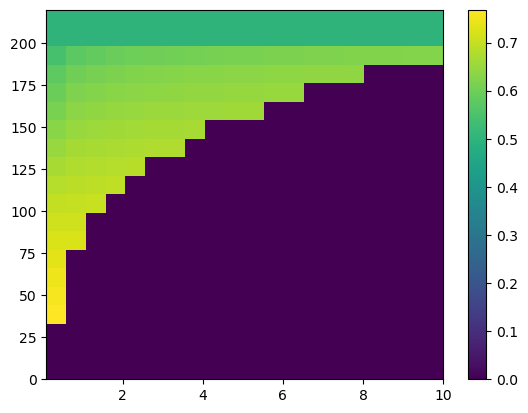

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Remove any NaN values from the dataset before interpolation
purity_trends_clean = purity_trends.dropna()

# Extract relevant columns
X = purity_trends_clean['Flash Pressure (bar)']
Y = purity_trends_clean['Heater Temperature (°C)']
Z = purity_trends_clean['Benzene Purity (Vapor)']  # Using Benzene Purity in Vapor as the target

# Create a grid for contour plotting
xi, yi = np.unique(X), np.unique(Y)
zi = np.array(Z).reshape(len(yi), len(xi))  

plt.imshow(zi, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()

In [11]:
# Extract data from all entries in the list
flash_pressures = []
heater_temperatures = []
benzene_purity_vapor = []
toluene_purity_vapor = []
benzene_purity_liquid = []
toluene_purity_liquid = []

for entry in data_2:
    flash_pressures.append(entry['Pressure Flash'])
    heater_temperatures.append(entry['HeaterInputs']['Temperature'])
    
    # Extract mole fractions in vapor and liquid phase
    vapor_mole_frac = entry['VaporOutputs']['MoleFracList']
    liquid_mole_frac = entry['LiquidOutputs']['MoleFracList']

    benzene_purity_vapor.append(vapor_mole_frac[0])
    toluene_purity_vapor.append(vapor_mole_frac[1])
    benzene_purity_liquid.append(liquid_mole_frac[0])
    toluene_purity_liquid.append(liquid_mole_frac[1])

# Create DataFrame
purity_trends = pd.DataFrame({
    'Flash Pressure (bar)': flash_pressures,
    'Heater Temperature (°C)': heater_temperatures,
    'Benzene Purity (Vapor)': benzene_purity_vapor,
    'Toluene Purity (Vapor)': toluene_purity_vapor,
    'Benzene Purity (Liquid)': benzene_purity_liquid,
    'Toluene Purity (Liquid)': toluene_purity_liquid
})

na_counts = purity_trends.isna().sum()
print(na_counts)

Flash Pressure (bar)       0
Heater Temperature (°C)    0
Benzene Purity (Vapor)     0
Toluene Purity (Vapor)     0
Benzene Purity (Liquid)    0
Toluene Purity (Liquid)    0
dtype: int64


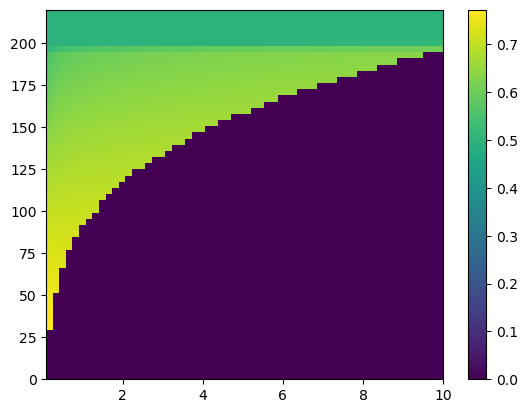

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Remove any NaN values from the dataset before interpolation
purity_trends_clean = purity_trends.dropna()

# Extract relevant columns
X = purity_trends_clean['Flash Pressure (bar)']
Y = purity_trends_clean['Heater Temperature (°C)']
Z = purity_trends_clean['Benzene Purity (Vapor)']  # Using Benzene Purity in Vapor as the target

# Create a grid for contour plotting
xi, yi = np.unique(X), np.unique(Y)
zi = np.array(Z).reshape(len(yi), len(xi))  

plt.imshow(zi, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()

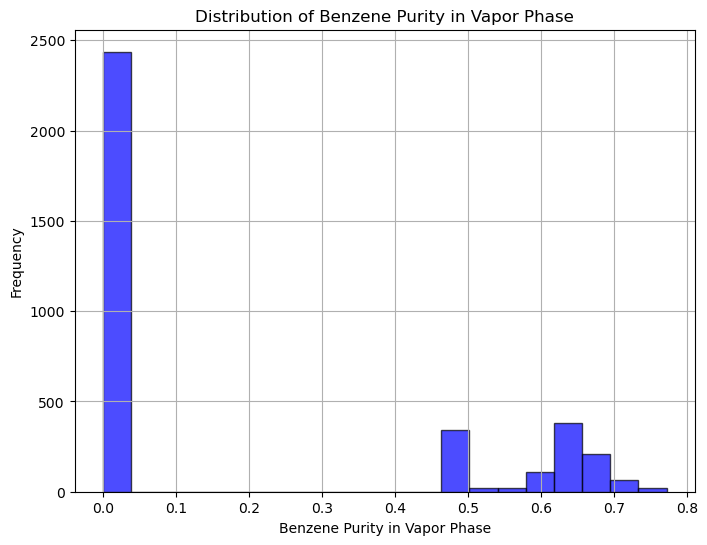

In [13]:
## plot the distribution of the purity of benzene in vapor phase
# remove 0 values from the list as they are when there is no vapor phase
# benzene_purity_vapor = [x for x in benzene_purity_vapor if x != 0]
plt.figure(figsize=(8, 6))
plt.hist(benzene_purity_vapor, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Benzene Purity in Vapor Phase")
plt.ylabel("Frequency")
plt.title("Distribution of Benzene Purity in Vapor Phase")
plt.grid(True)